# Fully Connected vs. Convolutional Neural Networks

## Refs 

[1] https://www.tensorflow.org/install

[2] https://www.tensorflow.org/tutorials/keras/classification
    

In [25]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,TensorBoard
import matplotlib.pyplot as plt
import numpy as np

## Sequential Neural Network

In [26]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


def show_images(rows, cols, data, labels):

    width= 3 * rows
    height= 3 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        b = data[a]
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(data[a, :, :, 0], cmap='gray')
    fig.tight_layout()    
    plt.show()


In [27]:
mnist = tf.keras.datasets.mnist

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [29]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print(x_train.shape, x_train.shape)

(60000, 28, 28, 1) (60000, 28, 28, 1)


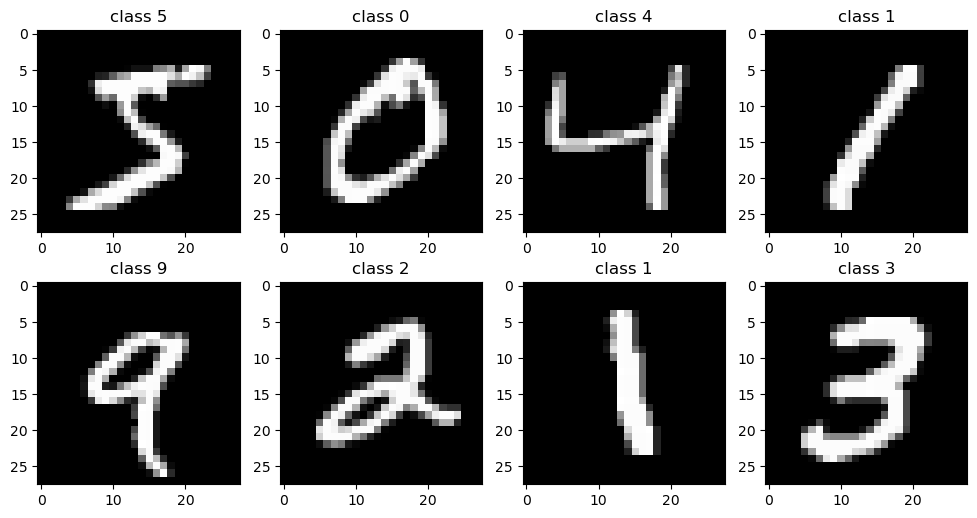

<Figure size 640x480 with 0 Axes>

In [30]:
show_images(2, 4, x_train, y_train)

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 2.3416 - accuracy: 0.0711


[2.341597557067871, 0.07109999656677246]

In [34]:
history = model.fit(x_train, y_train, batch_size=32, epochs=28, validation_split=0.2)

Epoch 1/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2210 - accuracy: 0.9331 - val_loss: 0.1265 - val_accuracy: 0.9621
Epoch 2/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0930 - accuracy: 0.9705 - val_loss: 0.1030 - val_accuracy: 0.9675
Epoch 3/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0613 - accuracy: 0.9804 - val_loss: 0.0994 - val_accuracy: 0.9722
Epoch 4/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0444 - accuracy: 0.9857 - val_loss: 0.0896 - val_accuracy: 0.9731
Epoch 5/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0972 - val_accuracy: 0.9715
Epoch 6/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0294 - accuracy: 0.9899 - val_loss: 0.1040 - val_accuracy: 0.9750
Epoch 7/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.1101 - val_accuracy:

In [35]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1697 - accuracy: 0.9794


[0.16970686614513397, 0.9793999791145325]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


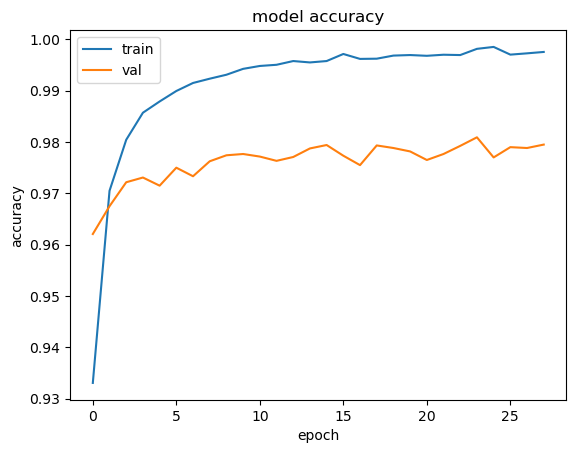

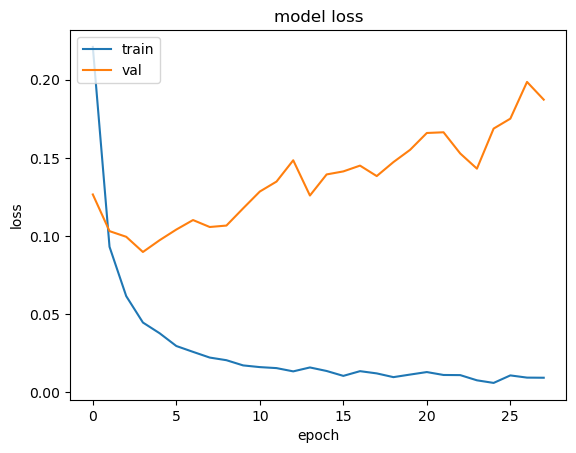

In [36]:
show_history(history)

In [37]:
best_epoch = np.argmax(history.history['val_accuracy'])

print("Best epoch score ->", best_epoch, "epoch")

Best epoch score -> 23 epoch


In [38]:
file_path = 'Best_Model_Sequential'

check_pointer_Seq = ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True)
early_stopper_Seq = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=8, verbose=1)
tbCallback_Seq    = TensorBoard(log_dir='logSeq', histogram_freq=0, write_graph=True, write_images=True)

In [39]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[check_pointer_Seq, early_stopper_Seq, tbCallback_Seq])

Epoch 1/100
1473/1500 [============================>.] - ETA: 0s - loss: 0.2206 - accuracy: 0.9334
Epoch 00001: val_accuracy improved from -inf to 0.95600, saving model to Best_Model_Sequential
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2190 - accuracy: 0.9339 - val_loss: 0.1389 - val_accuracy: 0.9560
Epoch 2/100
1458/1500 [============================>.] - ETA: 0s - loss: 0.0892 - accuracy: 0.9723
Epoch 00002: val_accuracy improved from 0.95600 to 0.96833, saving model to Best_Model_Sequential
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0900 - accuracy: 0.9721 - val_loss: 0.0994 - val_accuracy: 0.9683
Epoch 3/100
1458/1500 [============================>.] - ETA: 0s - loss: 0.0601 - accuracy: 0.9808
Epoch 00003: val_accuracy did not improve from 0.96833
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0598 - accuracy: 0.9809 - val_loss: 0.1124 - val_accuracy: 0.9672
Epoch 4/100
1498/1500 [============================>.] -

In [41]:
model2.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1233 - accuracy: 0.9781


[0.12327533960342407, 0.9781000018119812]

In [42]:
model2.load_weights(file_path)

In [43]:
model2.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0824 - accuracy: 0.9791


[0.0823533907532692, 0.9790999889373779]

In [44]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


## Convolutional Neural Networks

In [45]:
def createConvModel():
    modelConv = tf.keras.Sequential()
    modelConv.add(tf.keras.layers.Input(shape=(28,28,1)))
    modelConv.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
    modelConv.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
    modelConv.add(tf.keras.layers.Flatten())
    modelConv.add(tf.keras.layers.Dense(32, activation='relu'))
    modelConv.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    modelConv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return modelConv
    
modelConv = createConvModel()

print(modelConv.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                294944    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 297,754
Trainable params: 297,754
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
file_path = 'Best_Model_Convolutional'

check_pointer_Conv = ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True)
early_stopper_Conv = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=8, verbose=1)
tbCallback_Conv    = TensorBoard(log_dir='logConv', histogram_freq=0, write_graph=True, write_images=True)

In [47]:
history = modelConv.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[check_pointer_Conv, early_stopper_Conv, tbCallback_Conv], validation_split=0.2)

Epoch 1/100
1496/1500 [============================>.] - ETA: 0s - loss: 0.1679 - accuracy: 0.9503
Epoch 00001: val_accuracy improved from -inf to 0.97950, saving model to Best_Model_Convolutional
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1677 - accuracy: 0.9503 - val_loss: 0.0717 - val_accuracy: 0.9795
Epoch 2/100
1495/1500 [============================>.] - ETA: 0s - loss: 0.0575 - accuracy: 0.9817
Epoch 00002: val_accuracy improved from 0.97950 to 0.98258, saving model to Best_Model_Convolutional
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0576 - accuracy: 0.9817 - val_loss: 0.0581 - val_accuracy: 0.9826
Epoch 3/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.0358 - accuracy: 0.9886
Epoch 00003: val_accuracy improved from 0.98258 to 0.98317, saving model to Best_Model_Convolutional
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0607 - val_accuracy: 0.983

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


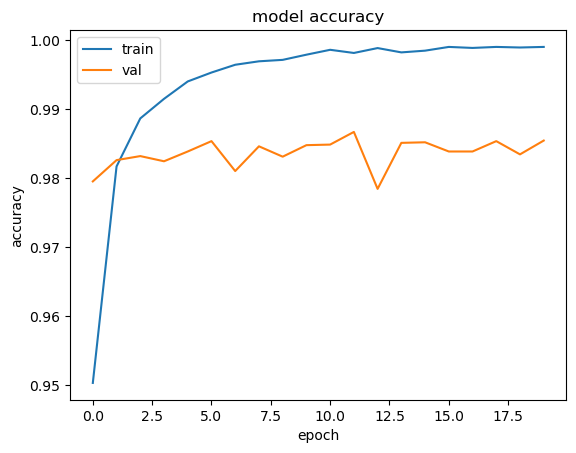

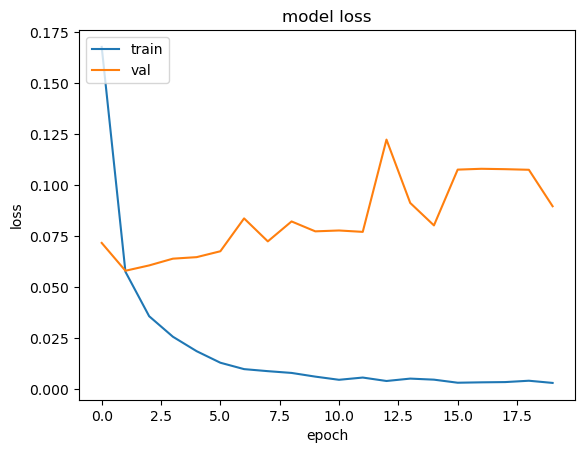

In [48]:
show_history(history)

In [49]:
modelConv.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0803 - accuracy: 0.9857


[0.08034732937812805, 0.9857000112533569]

## Create new modelm load the weights and evaluate

In [50]:
m = createConvModel()

m.load_weights(file_path)
m.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0736 - accuracy: 0.9849


[0.0736319050192833, 0.9848999977111816]

## Visualizing the convolution layers

Check the layers in the model:

In [51]:
for layer in modelConv.layers:
    print(layer.name)

conv2d_2
conv2d_3
flatten_5
dense_14
dense_15


Build a model with all the conv layers as outputs

In [52]:
# Extract the outputs of the top 2 layers
layer_output = [layer.output for layer in modelConv.layers[:2]]
# Build new model
activation_model = tf.keras.models.Model(inputs=modelConv.input, outputs=layer_output)

activation_model.summary()

tf.keras.utils.plot_model(activation_model, "img1", show_shapes=True)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        2320      
Total params: 2,480
Trainable params: 2,480
Non-trainable params: 0
_________________________________________________________________


ValueError: Cannot embed the 'img1' image format

In [ ]:
activations = activation_model.predict(np.asarray([x_test[0]]))

first_layer_activation = activations[0]
print(first_layer_activation.shape)

second_layer_activation = activations[1]
print(second_layer_activation.shape)

Show activation of the 3rd filter on the second convolutional layer

In [ ]:
plt.matshow(second_layer_activation[0, :, :, 2], cmap='red')

Show all activations

In [ ]:
layer_names = [layer.name for layer in activation_model.layers]
print(layer_names)

for layer_n, layer_a in zip(layer_names[1:], activations):
    filters = layer_a.shape[-1]
    labels = [layer_n + ' ' + str(i) for i in range(filters)]
    images = np.swapaxes(layer_a[0], 2, 0) # filters as first dimension
    images = np.swapaxes(images, 1, 2) # swap x and y
    images = images[..., None] # add extra dimension at end
    print(images.shape)
    show_images(2, 8, images, labels)